In [1]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import unicodedata
import re
import matplotlib.pyplot as plt
% matplotlib inline
from matplotlib.pyplot import figure


In [2]:
fp = open('./corpus/eng-indo.txt', 'r')
text = fp.read()
text = text.splitlines()
fp.close()

# Turn a Unicode string to plain ASCII, thanks to
# https://stackoverflow.com/a/518232/2809427
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
    )

# Lowercase, trim, and remove non-letter characters


def normalizeString(s):
    s = unicodeToAscii(s.lower().strip())
    s = re.sub(r"([.!?])", r" \1", s)
    s = re.sub(r"[^a-zA-Z.!?]+", r" ", s)
    return s


text_dict = {"English": [], "Indonesian": []}
for l in text:
    split_text = l.split("\t")
    text_dict["English"].append(normalizeString(split_text[0]))
    text_dict["Indonesian"].append(normalizeString(split_text[1]))
    
df = pd.DataFrame.from_dict(text_dict)
print(df.shape)


(6752, 2)


In [3]:
print(len(df))

6752


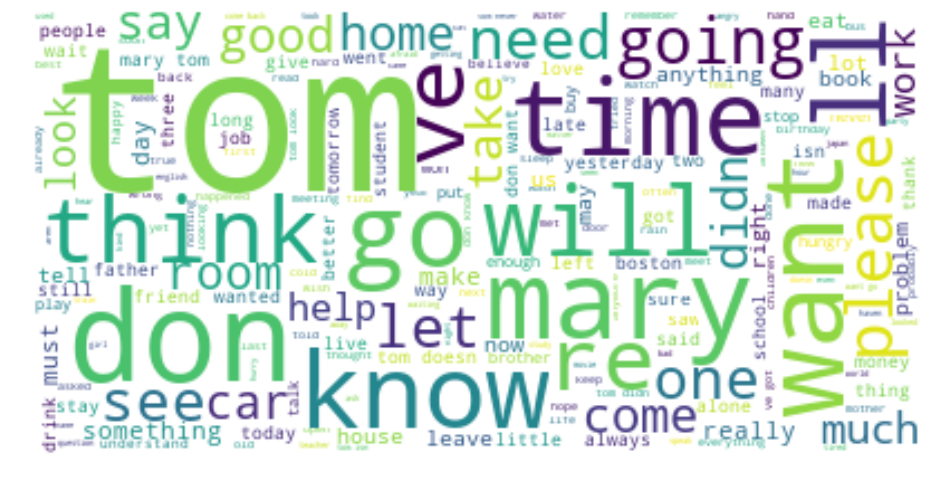

In [8]:
text = " ".join(review for review in df.English)
text.replace("?", "").replace("!" ,"").replace(".","").replace("   ", "")
wordcloud = WordCloud(background_color="white").generate(text)
plt.rcParams["figure.figsize"] = [16,9]
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

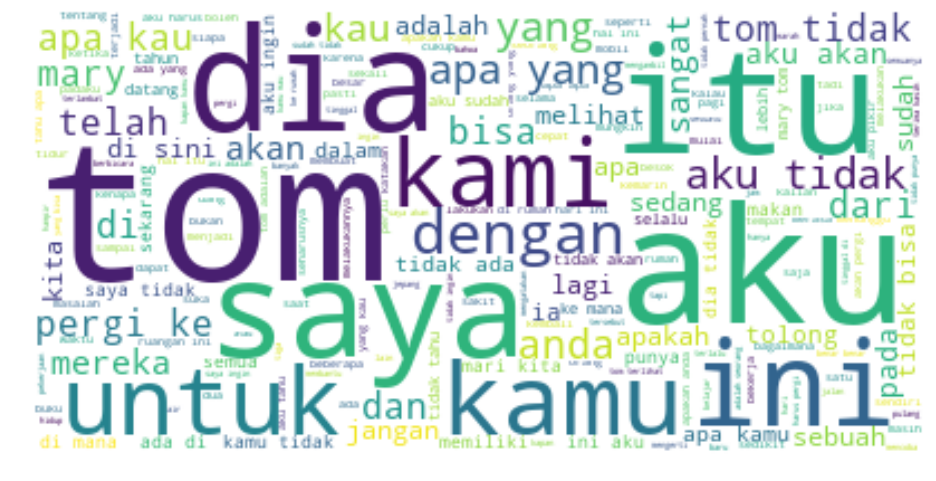

In [6]:
plt.rcParams["figure.figsize"] = [16,9]
text_2 = " ".join(review for review in df.Indonesian)
text_2.replace("?", "").replace("!" ,"").replace(".","").replace("   ", "")
wordcloud_2 = WordCloud(background_color="white").generate(text_2)
plt.imshow(wordcloud_2, interpolation='bilinear')
plt.axis("off")
plt.show()